In [25]:
import pandas as pd

df = pd.read_csv("D:\\Projects\\Human-Behavior-Drift-Detection-System\\data\\Processed\\behavior_features_1.csv")

# remove empty rows
df = df.dropna()

features = df[[
    "speed",
    "direction",
    "density",
    "direction_entropy",
    "avg_neighbor_dist"
]]


In [26]:
df["direction_entropy"] = df["direction_entropy"].abs()


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(features)


In [28]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42
)

model.fit(X)

df["anomaly"] = model.predict(X)   # -1 = drift, 1 = normal
df["anomaly_score"] = model.decision_function(X)


In [29]:
df["anomaly"] = df["anomaly"].map({1: "normal", -1: "drift"})

In [30]:
df.anomaly.value_counts()

anomaly
normal    9341
drift      492
Name: count, dtype: int64

In [31]:
# show drift samples
df[df["anomaly"] == "drift"]

,time,speed,direction,density,direction_entropy,avg_neighbor_dist,anomaly,anomaly_score
17,36,2.268382,-2.675093,2,0.000000,481.395836,drift,-0.023738
52,79,5.676710,2.874525,6,1.332179,54.146374,drift,-0.020360
53,93,27.734055,-2.905044,2,0.693147,46.572356,drift,-0.040465
59,112,27.895608,3.039117,2,0.693147,51.824903,drift,-0.056694
78,131,9.261499,3.025642,5,1.332179,172.462404,drift,-0.016526
...,...,...,...,...,...,...,...,...
10115,8645,13.902429,-1.905280,2,0.693147,394.354515,drift,-0.009328
10264,8697,25.593897,2.978576,4,1.039721,88.202144,drift,-0.056362
10346,8844,16.503243,2.878179,1,0.000000,0.000000,drift,-0.027782
10354,8858,23.919915,-2.573464,1,0.000000,0.000000,drift,-0.064071


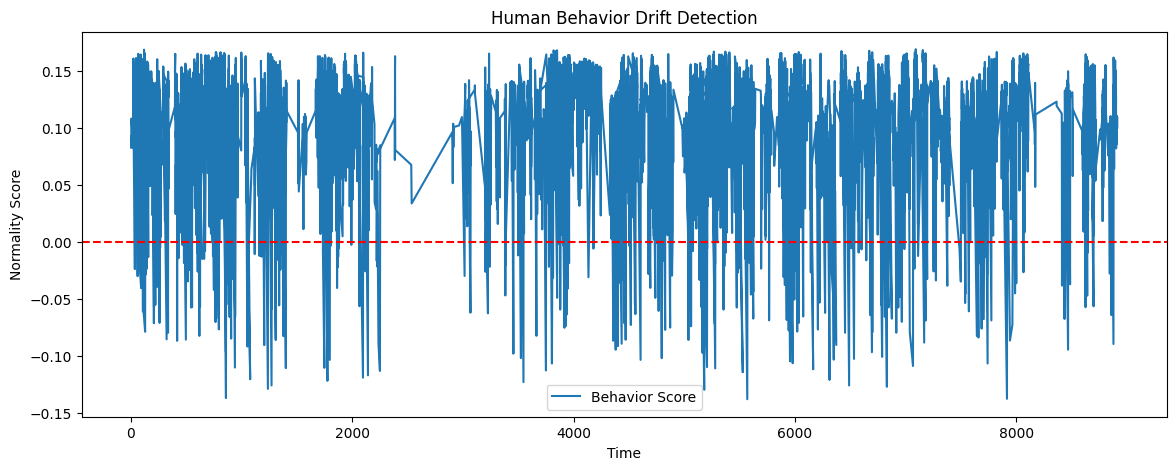

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df["time"], df["anomaly_score"], label="Behavior Score")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Normality Score")
plt.title("Human Behavior Drift Detection")
plt.legend()
plt.show()
